In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import desc

In [48]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, func
from sqlalchemy import cast
from sqlalchemy import text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#got attribute error in the next cell when using the names of the csv files. So adding the step to check available tables in the db.
available_tables = engine.table_names()
print(available_tables)

['measurement', 'station']


/var/folders/h6/rstm4b2j0g928d95j1p6tr400000gn/T/ipykernel_43201/3756458363.py:4: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  available_tables = engine.table_names()


In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# View all of the classes that automap found
classes = Base.classes.keys()
print(classes)

['measurement', 'station']


In [7]:
# Save references to each table
tables = {}
for class_name in Base.classes.keys():
    table_reference = getattr(Base.classes, class_name)
    tables[measurement] = table_reference
    tables[station] = table_reference


In [11]:
# Create our session (link) from Python to the DB

Session = sessionmaker(bind=engine)
session = Session()
print(Base.metadata.bind)
print(session.bind)

None
Engine(sqlite:///Resources/hawaii.sqlite)


# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
#Date information is in the measurement table.

most_recent_date = session.execute("SELECT MAX(date) FROM measurement").fetchone()
print(f"The most recent date is: {most_recent_date[0]}")


The most recent date is: 2017-08-23


The most recent precipitations are: [(0.0,), (0.0,), (0.08,), (0.45,)]
One year before the most recent date is: 2016-08-23


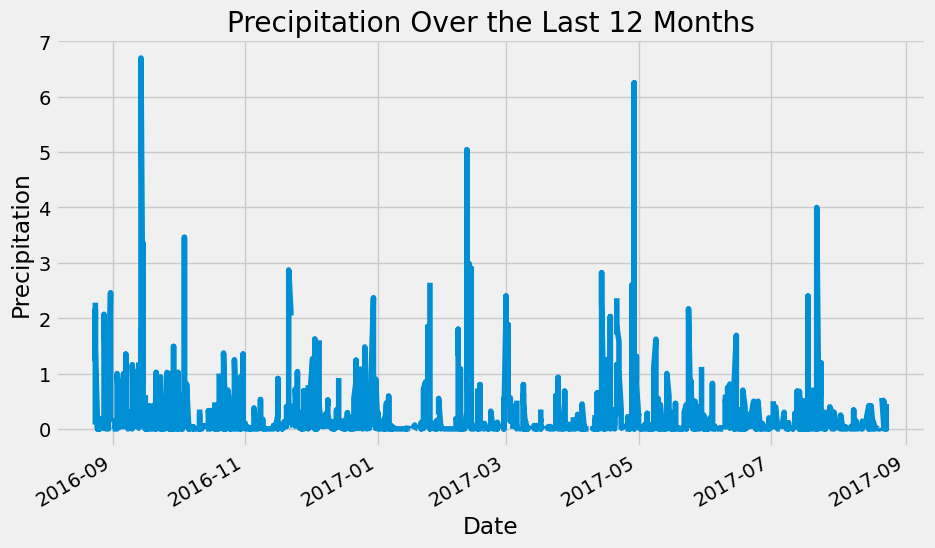

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent_data = session.query(measurement.prcp).filter(measurement.date == most_recent_date[0]).all()
print(f"The most recent precipitations are: {most_recent_data}")

# Calculate the date one year from the last date in data set.

# Convert the most recent date string to a datetime object


# Calculate the date one year before
one_year_before_date = session.query(
    func.date(func.max(measurement.date), '-365 days')
).scalar()

print(f"One year before the most recent date is: {one_year_before_date}")
# Perform a query to retrieve the data and precipitation data

query = session.query(measurement.date, measurement.prcp).\
    filter(text("date > (SELECT date(MAX(date), '-365 day') FROM measurement)")).\
    order_by(measurement.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.read_sql_query(query.statement, session.bind)
df.columns = ['date', 'prcp']

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

# # Sort the DataFrame by the date index
# df.sort_index(inplace=True)
df['prcp'].plot(figsize=(10, 6), title='Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

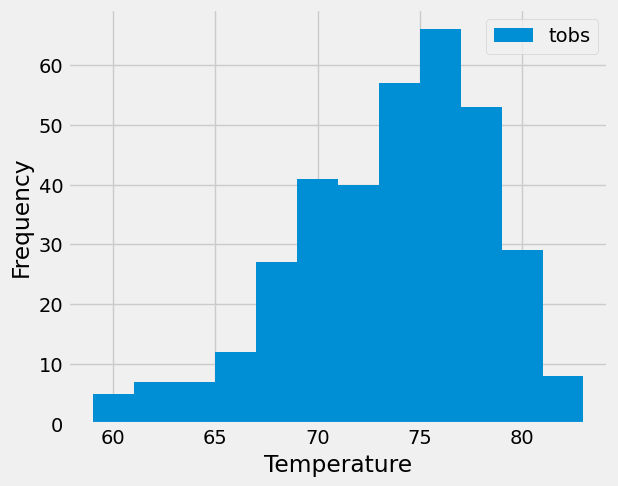

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()